<a href="https://colab.research.google.com/github/betr0dalf/TIMO/blob/main/TIMO_NovikovDV_prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Технологии и инструментарий машинного обучения
# Практическая работа № 3
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

# Шаг №1
Решить задачу регрессии на примере следующих данных:

## Аналитический метод (Метод Наименьших Квадратов)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Исходные данные
x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
     5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,6.3654, 5.1301,
     6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828,
     10.957, 13.176, 22.203, 5.2524, 6.5894,9.2482, 5.8918, 8.2111, 7.9334,
     8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247,
     7.0931, 5.0702, 5.8014,11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031,
     6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279,
     14.908, 18.959,7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345,
     6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292,
     5.1884,6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594,
     5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
y = [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987, 3.8166,
     3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,3.6518,
     5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467,
     14.692, 24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,4.1164,
     3.3928, 10.117, 5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463,
     5.1337, 1.844, 8.0043, 1.0179, 6.7504, 1.8396, 4.2885, 4.9981,1.4233,
     -1.4211, 2.4756, 4.6042, 3.9624, 5.4141, 5.1694, -0.74279, 17.929, 12.054,
     17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992, 6.6799, 4.0259,1.2784, 3.3411,
     -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576, 0.47953, 0.20421, 0.67861,
     7.5435, 5.3436, 4.2415, 6.7981, 0.92695, 0.152, 2.8214,1.8451, 4.2959, 7.2029,
     1.9869, 0.14454, 9.0551, 0.61705]

X = np.vstack([np.ones(len(x)), x]).T

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print('Свободный член b₀ = ', theta[0])
print('Коэффициент наклона b₁ = ', theta[1])

Свободный член b₀ =  -3.8957808783118772
Коэффициент наклона b₁ =  1.1930336441895957


# Шаг №2
Написать функцию, которая реализует численное решение задачи регрессии.

## Численный метод

In [ ]:
learning_rate = 0.01
num_iterations = 100000

X = np.array(x)
Y = np.array(y)
w = np.random.rand(2)
X = np.hstack((np.ones((X.shape[0], 1)), X.reshape((-1, 1))))

for i in range(num_iterations):
    grad = 2*(X.T@X@w-X.T@Y) / X.shape[0]
    w -= learning_rate * grad

beta0 = w[0]
beta1 = w[1]

print('Свободный член b₀ = ', beta0)
print('Коэффициент наклона b₁ = ', beta1)

y_pred = np.array(x) * beta1 + beta0

Свободный член b₀ =  -3.8957808783118377
Коэффициент наклона b₁ =  1.1930336441895923


# Шаг №3
Построить график построенной модели.

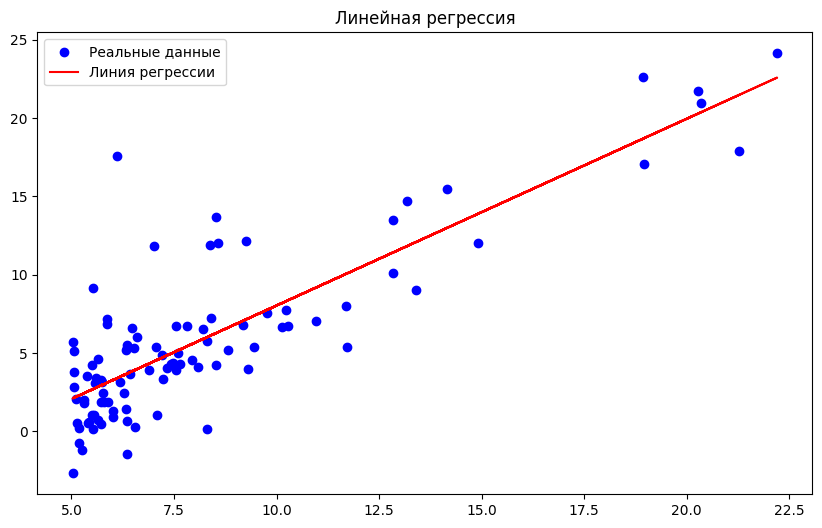

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Реальные данные')
plt.plot(x, y_pred, color='red', label='Линия регрессии')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

# Шаг №4
Сравнить результат численного решения с аналитическим.

В результате решения задачи линейной регрессии численным и аналитическими методами была получена допустимая погрешность, сильно не влияющая на результат.

# Шаг №5-7
5) Решить задачу регрессии для структурированных данных. Повторов в группе
по выбору данных быть не должно. В качестве данных выбран датасет California Housing из sklearn.datasets.

6) Сравнить работу линейной регрессии с Lasso-регрессией и с Ridge-регрессией.

7) Вывести метрики оценки качества модели для задачи регрессии.

In [ ]:
# Импорт библиотек
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error


# Загрузка данных California Housing
housing_data = fetch_california_housing()

# Преобразуем данные в DataFrame
data = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
data['target'] = housing_data.target

# Проверка на наличие дубликатов в исходных данных
print("Число дубликатов в исходных данных:", data.duplicated().sum())

# Удаление дубликатов, если они есть
data = data.drop_duplicates()

# Вывод первых строк данных
print("\nПервые строки данных:")
display(data.head())

# Нормализация для Min-Max Scaling
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Вывод первых строк нормализованных данных
print("\nПервые строки нормализованных данных:")
display(data_scaled.head())

# Определение целевой переменной и признаков
X = data_scaled.drop('target', axis=1)
y = data_scaled['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей
linear_regr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

linear_regr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_linear = linear_regr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Оценка моделей
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

r_linear = r2_score(y_test, y_pred_linear)
r_lasso = r2_score(y_test, y_pred_lasso)
r_ridge = r2_score(y_test, y_pred_ridge)

# Вывод метрик
dff = pd.DataFrame({
    'MAE': [mae_linear, mae_lasso, mae_ridge],
    'MAPE': [mape_linear, mape_lasso, mape_ridge],
    'MSE': [mse_linear, mse_lasso, mse_ridge],
    'R²': [r_linear, r_lasso, r_ridge],
}, index=['Linear model', 'Lasso model', 'Ridge model'])

print("\nМетрики моделей:")
display(dff)


Число дубликатов в исходных данных: 0

Первые строки данных:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Первые строки нормализованных данных:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638



Метрики моделей:


,MAE,MAPE,MSE,R²
Linear model,0.109938,5.477420e+11,0.023632,0.575788
Lasso model,0.186817,4.323348e+11,0.055720,-0.000219
Ridge model,0.111178,4.868835e+11,0.023168,0.584124


## Анализ полученных результатов:

**Линейная регрессия**:

На примере данных California Housing линейная регрессия показывает хорошую производительность с относительно низким значением ошибки (MAE) и значением коэффициента детерминации R² около 0.58. Это говорит о том, что модель объясняет примерно 57.6% дисперсии целевой переменной (стоимость жилья). Линейная регрессия не использует регуляризацию, поэтому она хорошо подходит, когда нет риска переобучения или мультиколлинеарности.

**Lasso-регрессия**:

Результаты Lasso-регрессии гораздо хуже по сравнению с линейной регрессией. Это можно объяснить тем, что Lasso использует L1-регуляризацию, которая заставляет коэффициенты некоторых признаков становиться нулевыми. В данном случае, скорее всего, модель слишком сильно "оштрафовала" коэффициенты, и важные признаки были исключены, что привело к потере информации и низкой точности предсказаний. R² даже отрицательный, что говорит о том, что модель хуже, чем просто среднее значение целевой переменной.

**Ridge-регрессия**:

Ridge-регрессия использует L2-регуляризацию, которая штрафует коэффициенты, не обнуляя их, а лишь уменьшая по модулю. Результаты Ridge близки к результатам линейной регрессии, но при этом модель справляется чуть лучше (более высокий R² = 0.584). Это говорит о том, что регуляризация помогла немного улучшить обобщающую способность модели, но при этом не привела к значительной потере информации, как в случае с Lasso.

Lasso здесь не подходит из-за избыточного штрафа, который привел к ухудшению модели. Ridge помогает бороться с переобучением без критической потери точности, поэтому он подходит для этих данных лучше всего.